# Numbers Game

This notebook illustrate the process of maximum likelihood estimation, maximum a posteriori estimation, computing predictive distributions, etc. using the set of distributions over the integers described in the slides of the course.

We import the required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We define the range of the integers we will consider

first = 1
last = 100

## Potential Distributions

We now specify the different uniform distributions we may consider. For this, we use python dictionaries.

In [3]:
allN = np.arange(first, last + 1)

allintegers = {'values': allN, 'name': 'all', 'size': len(allN)}
even = {'values': allN[ allN % 2 == 0 ],'name': 'even', 'size' : len(allN[ allN % 2 == 0 ])}
odd = {'values': allN[ allN % 2 == 1 ],'name': 'odd', 'size' : len(allN[ allN % 2 == 1 ])}
multof3 = {'values': allN[ allN % 3 == 0 ],'name': 'multof3', 'size' : len(allN[ allN % 3 == 0 ])}
multof4 = {'values': allN[ allN % 4 == 0 ],'name': 'multof4', 'size' : len(allN[ allN % 4 == 0 ])}
multof5 = {'values': allN[ allN % 5 == 0 ],'name': 'multof5', 'size' : len(allN[ allN % 5 == 0 ])}
multof6 = {'values': allN[ allN % 6 == 0 ],'name': 'multof6', 'size' : len(allN[ allN % 6 == 0 ])}
multof7 = {'values': allN[ allN % 7 == 0 ],'name': 'multof7', 'size' : len(allN[ allN % 7 == 0 ])}
multof8 = {'values': allN[ allN % 8 == 0 ],'name': 'multof8', 'size' : len(allN[ allN % 8 == 0 ])}
multof9 = {'values': allN[ allN % 9 == 0 ],'name': 'multof9', 'size' : len(allN[ allN % 9 == 0 ])}
multof10 = {'values': allN[ allN % 10 == 0 ],'name': 'multof10', 'size' : len(allN[ allN % 10 == 0 ])}
endsin0 = {'values': allN[ allN % 10 == 0 ],'name': 'endsin0', 'size' : len(allN[ allN % 10 == 0 ])}
endsin1 = {'values': allN[ allN % 10 == 1 ],'name': 'endsin1', 'size' : len(allN[ allN % 10 == 1 ])}
endsin2 = {'values': allN[ allN % 10 == 2 ],'name': 'endsin2', 'size' : len(allN[ allN % 10 == 2 ])}
endsin3 = {'values': allN[ allN % 10 == 3 ],'name': 'endsin3', 'size' : len(allN[ allN % 10 == 3 ])}
endsin4 = {'values': allN[ allN % 10 == 4 ],'name': 'endsin4', 'size' : len(allN[ allN % 10 == 4 ])}
endsin5 = {'values': allN[ allN % 10 == 5 ],'name': 'endsin5', 'size' : len(allN[ allN % 10 == 5 ])}
endsin6 = {'values': allN[ allN % 10 == 6 ],'name': 'endsin6', 'size' : len(allN[ allN % 10 == 6 ])}
endsin7 = {'values': allN[ allN % 10 == 7 ],'name': 'endsin7', 'size' : len(allN[ allN % 10 == 7 ])}
endsin8 = {'values': allN[ allN % 10 == 8 ],'name': 'endsin8', 'size' : len(allN[ allN % 10 == 8 ])}
endsin9 = {'values': allN[ allN % 10 == 9 ],'name': 'endsin9', 'size' : len(allN[ allN % 10 == 9 ])}

def powers_of(base):
    return (base**np.arange((np.log(first) / np.log(base)) + 1, \
        int((np.log(last) / np.log(base))) + 1)).astype(np.int64)

powersof2 = {'values': powers_of(2),'name': 'powersof2', 'size' : len(powers_of(2))}
powersof3 = {'values': powers_of(3),'name': 'powersof3', 'size' : len(powers_of(3))}
powersof4 = {'values': powers_of(4),'name': 'powersof4', 'size' : len(powers_of(4))}
powersof5 = {'values': powers_of(5),'name': 'powersof5', 'size' : len(powers_of(5))}
powersof6 = {'values': powers_of(6),'name': 'powersof6', 'size' : len(powers_of(6))}
powersof7 = {'values': powers_of(7),'name': 'powersof7', 'size' : len(powers_of(7))}
powersof8 = {'values': powers_of(8),'name': 'powersof8', 'size' : len(powers_of(8))}
powersof9 = {'values': powers_of(9),'name': 'powersof9', 'size' : len(powers_of(9))}
powersof10 = {'values': powers_of(10),'name': 'powersof10', 'size' : len(powers_of(10))}

powersof2plus37 = {'values': np.sort(np.append(powers_of(2), [37])),'name': \
    'powersof2plus37', 'size' : len(powers_of(2)) + 1}

powersof2except32 = {'values': powers_of(2)[ powers_of(2) != 32 ],'name': \
    'powersof2except32', 'size' : len(powers_of(2)) - 1}

# We store the distributions in a list

distributions = [ allintegers, even, odd, multof3, multof4, multof5, multof6, multof7, \
    multof8, multof9, multof10, endsin0, endsin1, endsin2, endsin3, endsin4, endsin5, endsin6, \
    endsin7, endsin8, endsin9, powersof2, powersof3, powersof4, powersof5, powersof6, powersof7, \
    powersof8, powersof9, powersof10, powersof2plus37, powersof2except32 ]


## Prior Probabilitites

We specify the prior probability of each distribution. We consider that odd and even are more likely a priori, and that powers of 2 plus 37 and powers of 2 minus 32 are less likely.

In [4]:
# We set at first all distributions to have the same prior probability

for i in range(len(distributions)):
    distributions[ i ]['prior'] = 0.05
    
# We now increase a bit the probability of even and odd numbers

even['prior'] = 0.5
odd['prior'] = 0.5

powersof2plus37['prior'] = 0.001
powersof2except32['prior'] = 0.001

# We now normalize the probabilities to add up to one

total_probability = 0.0

for i in range(len(distributions)):
    total_probability += distributions[ i ]['prior'];
    
for i in range(len(distributions)):
    distributions[ i ]['prior'] /= total_probability
    


## Likelihood Function

We define a likelihood function to evaluate the probability of the observed data given some distribution.

In [5]:
def likelihood(data, distribution):
    
    possible_values = distribution['values']
    
    # If there is one observaion outside of the set of potential values we 
    # return 0, otherwise we return the probability of observing that data 
    # samplilng uniformly from the distribution
    
    if not (np.all(np.in1d(data, possible_values))):
        return 0.0
    else:
        return (1.0 / distribution['size'])**len(data)
    

In [6]:
print(likelihood(np.array([ 4, 16 ]), even))
print(likelihood(np.array([ 4, 16 ]), odd))
print(likelihood(np.array([ 4, 16 ]), powersof4))

0.0004
0.0
0.1111111111111111


## Posterior Probabilities

We define a function in python that will compute the posterior probability of each distribution given some data. For this, Bayes' rule will be used.

In [7]:
def posterior(data, distribution):
    
    numerator = likelihood(data, distribution) * distribution['prior'] 
    denominator = 0.0
    
    for i in range(len(distributions)):
        denominator += likelihood(data, distributions[ i ]) * \
            distributions[ i ]['prior'] 
        
    # If the data cannot be explained by any distribution we return 0.0 
    # as the posterior probability    
        
    if denominator == 0.0 and numerator == 0.0:
        return 0.0
        
    return numerator / denominator

We check that the posterior probabilities make sense

In [8]:
print(posterior(np.array([ 4, 16 ]), even))
print(posterior(np.array([ 4, 16 ]), odd))
print(posterior(np.array([ 4, 16 ]), powersof4))

0.027435396950067272
0.0
0.7620943597240908


## Predictive Distribution

We compute the predictive distribution given some observed data. This involves marginalizing across distributions.

In [9]:
def predictive(data):
    
    # We will store here the probability of each number
    
    prob_per_number = np.zeros(len(np.arange(first, last + 1)))
    
    for i in range(len(distributions)):
              
        prob_per_number[ distributions[ i ]['values'] - 1 ] += (1.0 / distributions[ i ]['size']) * \
            posterior(data, distributions[ i ])
        
    return prob_per_number

We briefly check that the predictive distribution is computed properly.

In [10]:
print(predictive(np.array([ 16  ])))

[1.06361426e-04 3.51906788e-02 1.06361426e-04 1.55071824e-01
 1.06361426e-04 1.49969611e-02 1.06361426e-04 4.42786718e-02
 1.06361426e-04 4.36081848e-03 1.06361426e-04 6.06260130e-03
 1.06361426e-04 4.36081848e-03 1.06361426e-04 1.73094177e-01
 1.06361426e-04 4.36081848e-03 1.06361426e-04 6.06260130e-03
 1.06361426e-04 4.36081848e-03 1.06361426e-04 1.34488115e-02
 1.06361426e-04 1.49969611e-02 1.06361426e-04 6.06260130e-03
 1.06361426e-04 4.36081848e-03 1.06361426e-04 4.34277804e-02
 1.06361426e-04 4.36081848e-03 1.06361426e-04 1.66987439e-02
 5.40489697e-04 4.36081848e-03 1.06361426e-04 1.34488115e-02
 1.06361426e-04 4.36081848e-03 1.06361426e-04 6.06260130e-03
 1.06361426e-04 1.49969611e-02 1.06361426e-04 1.34488115e-02
 1.06361426e-04 4.36081848e-03 1.06361426e-04 6.06260130e-03
 1.06361426e-04 4.36081848e-03 1.06361426e-04 2.40849541e-02
 1.06361426e-04 4.36081848e-03 1.06361426e-04 6.06260130e-03
 1.06361426e-04 4.36081848e-03 1.06361426e-04 1.62458034e-01
 1.06361426e-04 1.499696

# Illustrative Example

We carry out an illustrative example to plot the prior distribution, prior, likelihood and predictive distribution given some observed data. For this, we define next the data observed.

In [46]:
# This vector will store the observed data

data = np.array([ 2 ])

We plot the prior, likelhood and posterior probabilty of each distribution.

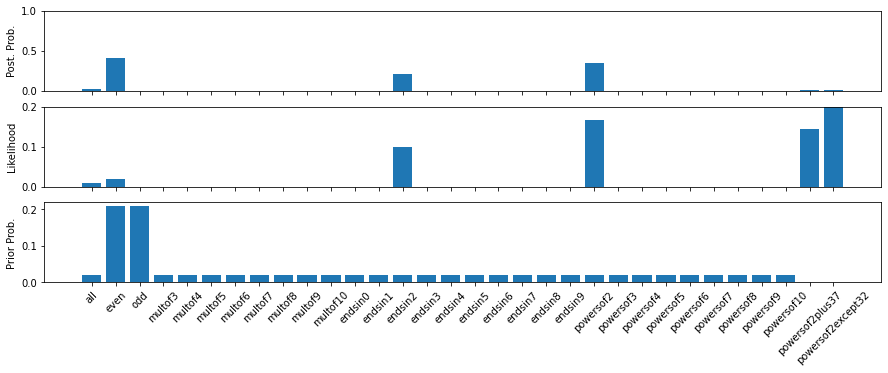

In [47]:
f, axarr = plt.subplots(3, 1, figsize=(15, 5))

# We plot the prior first at the bottom

priors = np.array([ distributions[ i ]['prior'] for i in range(len(distributions)) ])

axarr[ 2 ].bar(np.arange(1, len(distributions) + 1), priors)
axarr[ 2 ].set_xticks(np.arange(1, len(distributions) + 1))
axarr[ 2 ].set_xticklabels([ distributions[ i ]['name'] for i in range(len(distributions)) ], rotation = 45)
axarr[ 2 ].set_ylabel('Prior Prob.')

# We now plot the likelihood in the middle row

likelihood_values = np.array([ likelihood(data, distributions[ i ]) for i in range(len(distributions)) ])

axarr[ 1 ].bar(np.arange(1, len(distributions) + 1), likelihood_values)
axarr[ 1 ].set_xticks(np.arange(1, len(distributions) + 1))
axarr[ 1 ].set_xticklabels([ '' for i in range(len(distributions)) ], rotation = 45)
axarr[ 1 ].set_ylim([ 0, np.max(likelihood_values) ])
axarr[ 1 ].set_ylabel('Likelihood')

# We now plot the posterior at the top row

post_values = np.array([ posterior(data, distributions[ i ]) for i in range(len(distributions)) ])

axarr[ 0 ].bar(np.arange(1, len(distributions) + 1), post_values)
axarr[ 0 ].set_xticks(np.arange(1, len(distributions) + 1))
axarr[ 0 ].set_xticklabels([ '' for i in range(len(distributions)) ], rotation = 45)
axarr[ 0 ].set_ylim([ 0, 1 ])
axarr[ 0 ].set_ylabel('Post. Prob.')

plt.show()

We now show the predictive distribution given the observed data. 

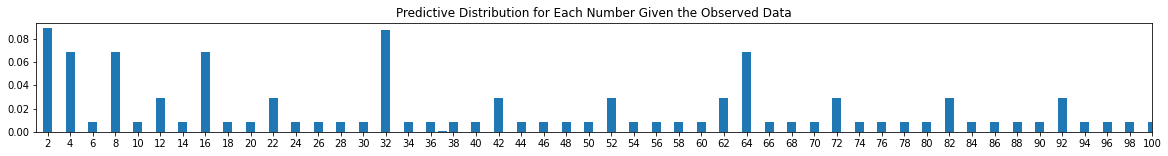

In [48]:
pred_dist = predictive(data)

plt.figure(figsize=(20, 2))
plt.title('Predictive Distribution for Each Number Given the Observed Data')
plt.xlim(first, last)
plt.xticks(even['values'])
plt.bar(allN, pred_dist)
plt.show()

We check that the probaiblities sum to one.

In [49]:
print(np.sum(pred_dist))

1.0


# Practical Exercise

Assume that we are observing the following numbers: 2. After observing each number, you are asked to plot the prior, likelihood and posterior distribution of each hypothetical distribution, and the corresponding predictive distribution. Explain the results observed (likelihood values, posterior and predictive distribution). Repeat again with the numbers 2, 4, 8, and 16. 